# 0. 모델 고정해서 사용하기

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, BatchNormalization, Flatten, Dense, Dropout

# Create the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    AveragePooling2D((2, 2)),
    BatchNormalization(),

    Conv2D(64, (3, 3), activation='relu'),
    AveragePooling2D((2, 2)),
    BatchNormalization(),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
average_pooling2d (AveragePo (None, 15, 15, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 15, 15, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
average_pooling2d_1 (Average (None, 6, 6, 64)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 6, 6, 64)          256       
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0

# 1. Data Centric AI 맛보기

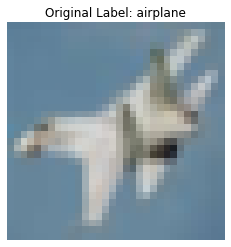

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# CIFAR-10 데이터 로드
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# CIFAR-10 클래스 이름
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

# 특정 ID의 이미지를 시각화
def visualize_image(image_id):
    plt.imshow(x_test[image_id])
    plt.title(f"Original Label: {class_names[y_test[image_id][0]]}")
    plt.axis('off')
    plt.show()

# ID로 잘못된 샘플 시각화
image_id = 10  # 예시 ID
visualize_image(image_id)


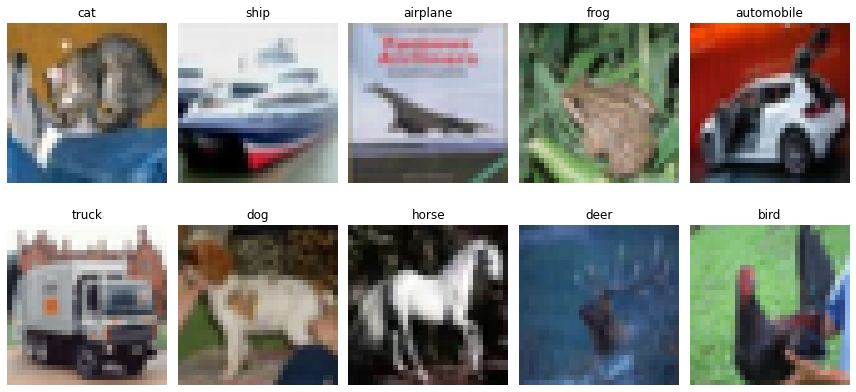

In [3]:
# CIFAR-10 데이터셋의 각 클래스에서 샘플 이미지 시각화
def visualize_all_classes():
    plt.figure(figsize=(12, 6))  # 전체 이미지 크기 설정
    unique_classes = set()  # 각 클래스를 추적할 집합

    for i in range(len(x_test)):
        label = y_test[i][0]
        if label not in unique_classes:  # 아직 보지 않은 클래스라면 추가
            unique_classes.add(label)
            plt.subplot(2, 5, len(unique_classes))  # 2x5 배열로 이미지 배치
            plt.imshow(x_test[i])
            plt.title(class_names[label])
            plt.axis('off')

        if len(unique_classes) == 10:  # 모든 클래스가 포함되면 중단
            break

    plt.tight_layout()
    plt.show()

# 모든 클래스의 샘플 이미지 시각화
visualize_all_classes()

In [4]:
# 레이블 수정 함수
def correct_label(image_id):
    print(f"Original Label: {class_names[y_test[image_id][0]]}")
    plt.imshow(x_test[image_id])
    plt.title("Image to Correct")
    plt.axis('off')
    plt.show()

    # 사용자로부터 새로운 레이블 입력받기
    print("Enter the correct label (choose one from the following):")
    for i, class_name in enumerate(class_names):
        print(f"{i}: {class_name}")

    corrected_label = int(input("Correct Label ID: "))
    if 0 <= corrected_label < len(class_names):
        y_test[image_id][0] = corrected_label
        print(f"Label corrected to: {class_names[corrected_label]}")
    else:
        print("Invalid label ID. No changes made.")


Original Label: cat


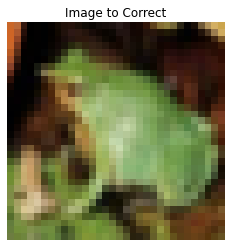

Enter the correct label (choose one from the following):
0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck
Correct Label ID: 6
Label corrected to: frog


In [5]:
# 잘못된 레이블 확인 및 수정
image_id = 2405
correct_label(image_id)

In [6]:
# 수정된 레이블 확인
print(f"Updated Label for Image ID {image_id}: {class_names[y_test[image_id][0]]}")


Updated Label for Image ID 2405: frog


Original Label: airplane


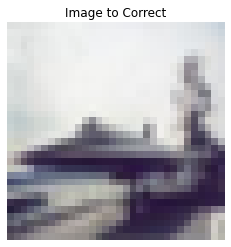

Enter the correct label (choose one from the following):
0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck
Correct Label ID: 8
Label corrected to: ship
Original Label: deer


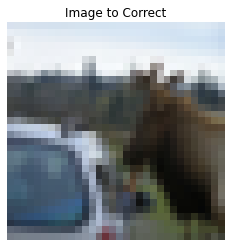

Enter the correct label (choose one from the following):
0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck
Correct Label ID: 7
Label corrected to: horse
Original Label: airplane


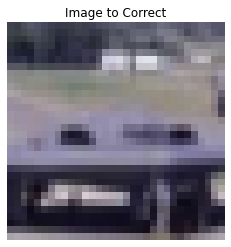

Enter the correct label (choose one from the following):
0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck
Correct Label ID: 1
Label corrected to: automobile


In [7]:
# 여러 이미지 레이블 확인 및 수정
image_ids_to_check = [6877, 8058, 2532]  # 확인할 이미지 ID 리스트
for img_id in image_ids_to_check:
    correct_label(img_id)


Original Label: automobile


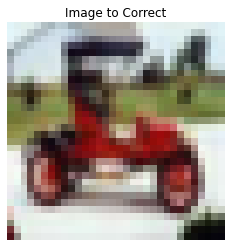

Enter the correct label (choose one from the following):
0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck
Correct Label ID: 9
Label corrected to: truck
Original Label: cat


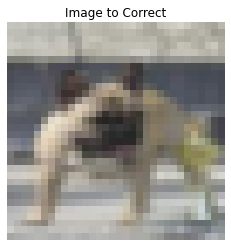

Enter the correct label (choose one from the following):
0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck
Correct Label ID: 5
Label corrected to: dog
Original Label: cat


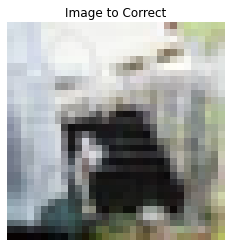

Enter the correct label (choose one from the following):
0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck
Correct Label ID: 9
Label corrected to: truck


In [8]:
# 여러 이미지 레이블 확인 및 수정
image_ids_to_check = [1969, 2804, 6792]  # 확인할 이미지 ID 리스트
for img_id in image_ids_to_check:
    correct_label(img_id)


Original Label: cat


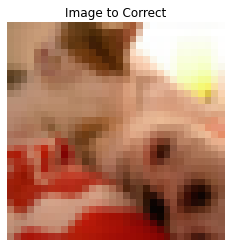

Enter the correct label (choose one from the following):
0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck
Correct Label ID: 5
Label corrected to: dog
Original Label: cat


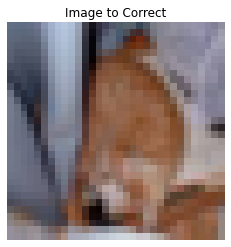

Enter the correct label (choose one from the following):
0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck
Correct Label ID: 5
Label corrected to: dog
Original Label: horse


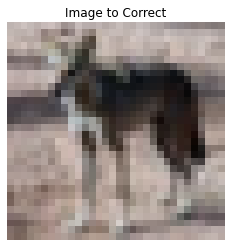

Enter the correct label (choose one from the following):
0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck
Correct Label ID: 4
Label corrected to: deer


In [9]:
# 여러 이미지 레이블 확인 및 수정
image_ids_to_check = [1227, 5191, 5690]  # 확인할 이미지 ID 리스트
for img_id in image_ids_to_check:
    correct_label(img_id)

Original Label: airplane


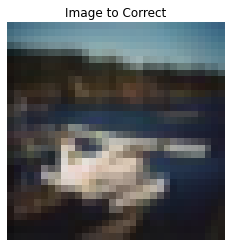

Enter the correct label (choose one from the following):
0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck
Correct Label ID: 8
Label corrected to: ship
Original Label: bird


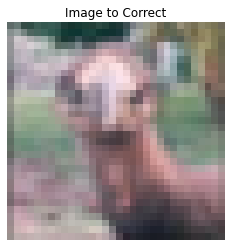

Enter the correct label (choose one from the following):
0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck
Correct Label ID: 4
Label corrected to: deer
Original Label: deer


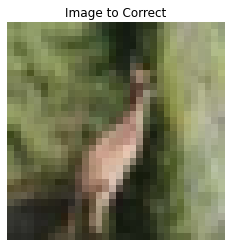

Enter the correct label (choose one from the following):
0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck
Correct Label ID: 2
Label corrected to: bird
Original Label: bird


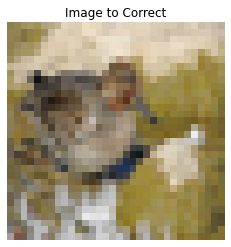

Enter the correct label (choose one from the following):
0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck
Correct Label ID: 2
Label corrected to: bird
Original Label: deer


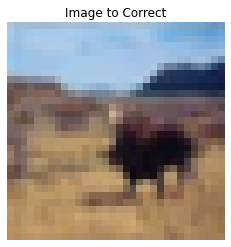

Enter the correct label (choose one from the following):
0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck
Correct Label ID: 2
Label corrected to: bird


In [10]:
# 여러 이미지 레이블 확인 및 수정
image_ids_to_check = [1718, 2592, 4794, 5960, 165]  # 확인할 이미지 ID 리스트
for img_id in image_ids_to_check:
    correct_label(img_id)

Original Label: automobile


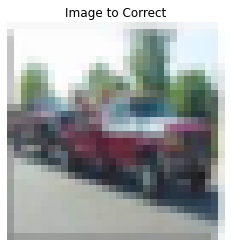

Enter the correct label (choose one from the following):
0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck
Correct Label ID: 9
Label corrected to: truck
Original Label: cat


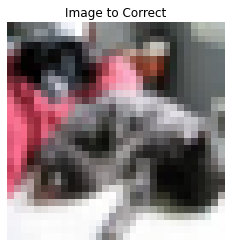

Enter the correct label (choose one from the following):
0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck
Correct Label ID: 5
Label corrected to: dog
Original Label: automobile


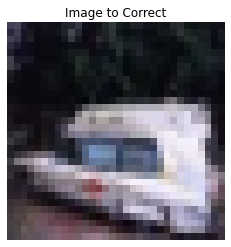

Enter the correct label (choose one from the following):
0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck
Correct Label ID: 1
Label corrected to: automobile
Original Label: frog


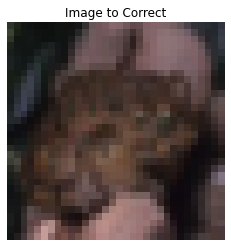

Enter the correct label (choose one from the following):
0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck
Correct Label ID: 6
Label corrected to: frog
Original Label: airplane


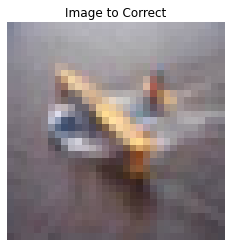

Enter the correct label (choose one from the following):
0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck
Correct Label ID: 8
Label corrected to: ship
Original Label: dog


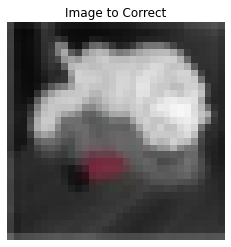

Enter the correct label (choose one from the following):
0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck
Correct Label ID: 3
Label corrected to: cat


In [11]:
# 여러 이미지 레이블 확인 및 수정
image_ids_to_check = [9227, 5632, 9352, 7846, 6966, 5468]  # 확인할 이미지 ID 리스트
for img_id in image_ids_to_check:
    correct_label(img_id)

# 2. 하이퍼파라미터 튜닝

In [12]:
pip install keras-tuner

     |████████████████████████████████| 129 kB 6.3 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, BatchNormalization, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from kerastuner.tuners import Hyperband
from tensorflow.keras.datasets import cifar10

# 데이터 로드 및 전처리
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # 정규화
y_train, y_test = to_categorical(y_train), to_categorical(y_test)  # One-hot encoding

# 모델 생성 함수
def build_model(hp):
    model = Sequential()
    
    # 첫 번째 Conv2D 레이어
    model.add(Conv2D(
        filters=hp.Int('conv1_filters', min_value=16, max_value=64, step=16),
        kernel_size=(3, 3),
        activation='relu',
        input_shape=(32, 32, 3)
    ))
    model.add(AveragePooling2D((2, 2)))
    model.add(BatchNormalization())
    
    # 두 번째 Conv2D 레이어
    model.add(Conv2D(
        filters=hp.Int('conv2_filters', min_value=32, max_value=128, step=32),
        kernel_size=(3, 3),
        activation='relu'
    ))
    model.add(AveragePooling2D((2, 2)))
    model.add(BatchNormalization())
    
    model.add(Flatten())
    
    # Dense 레이어
    model.add(Dense(
        units=hp.Int('dense_units', min_value=128, max_value=512, step=128),
        activation='relu'
    ))
    model.add(Dropout(rate=hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(10, activation='softmax'))
    
    # 모델 컴파일
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Hyperband 튜너 생성
tuner = Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='cifar10_tuning',
    project_name='cifar10_hyperband'
)

# 콜백 설정
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# 튜닝 시작
tuner.search(x_train, y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[stop_early])

# 최적의 하이퍼파라미터 출력
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
The optimal number of filters in the first Conv2D layer is {best_hps.get('conv1_filters')},
the optimal number of filters in the second Conv2D layer is {best_hps.get('conv2_filters')},
the optimal number of units in the Dense layer is {best_hps.get('dense_units')},
the optimal dropout rate is {best_hps.get('dropout_rate')},
and the optimal learning rate is {best_hps.get('learning_rate')}.
""")

# 최적의 하이퍼파라미터로 학습
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

# 모델 저장
best_model.save('saved_model/cifar10_model')


Trial 30 Complete [00h 00m 49s]
val_accuracy: 0.6772000193595886

Best val_accuracy So Far: 0.7272999882698059
Total elapsed time: 00h 14m 41s

The optimal number of filters in the first Conv2D layer is 32,
the optimal number of filters in the second Conv2D layer is 64,
the optimal number of units in the Dense layer is 512,
the optimal dropout rate is 0.2,
and the optimal learning rate is 0.00027679152802532797.

Epoch 1/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4032 - accuracy: 0.5243 - val_loss: 1.0939 - val_accuracy: 0.6214
Epoch 2/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9464 - accuracy: 0.6708 - val_loss: 0.9859 - val_accuracy: 0.6642
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7497 - accuracy: 0.7405 - val_loss: 0.9139 - val_accuracy: 0.6845
Epoch 4/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5948 - accuracy: 0.7944 - val_loss: 0.9605 - val_accuracy: 0.6884
Epoch 5

### 1. 최적 하이퍼파라미터:

첫 번째 Conv2D 레이어 필터 수: 32

두 번째 Conv2D 레이어 필터 수: 64

Dense 레이어 유닛 수: 512

드롭아웃 비율: 0.2

학습률: 0.00027679152802532797

### 2. 모델 학습:

최적의 하이퍼파라미터로 모델을 학습한 후, 20 에폭 동안 학습이 진행되었습니다.

학습 과정에서 훈련 정확도는 꾸준히 향상되었고, 검증 정확도도 안정적으로 개선되었습니다. 특히, 20번째 에폭에서 검증 정확도는 0.7263까지 도달했습니다.

### 3. 결과:

모델은 훈련을 마친 후, 'saved_model/cifar10_model' 경로에 저장되었습니다.

학습이 끝난 후 검증 정확도가 최고 0.7273까지 도달했으며, 학습이 진행되는 동안 검증 정확도가 0.7 이상을 유지하고 있습니다.

### 4. 모델 성능:

초기에 비해 모델이 상당히 향상되었습니다. 훈련 정확도는 매우 좋고, 검증 정확도도 거의 0.73에 근접하게 됐습니다.

검증 정확도가 다소 하락하는 경우도 있었지만, 전체적으로 0.7 이상의 성능을 보였으며, 마지막에 0.7263으로 종료되었습니다.

In [14]:
test_loss, test_acc = best_model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}, Test loss: {test_loss}")


313/313 [==============================] - 1s 3ms/step - loss: 1.3810 - accuracy: 0.7263
Test accuracy: 0.7263000011444092, Test loss: 1.3810293674468994


Test Accuracy: 0.73


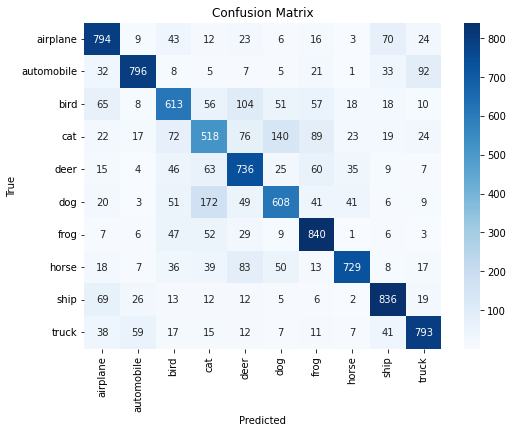

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# 테스트 데이터 평가
test_loss, test_accuracy = best_model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

# 혼동 행렬 시각화
y_pred = best_model.predict(x_test).argmax(axis=1)
y_true = y_test.argmax(axis=1)
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# 3. 모델 배포하기 (옵션)

환경설정이 어려워서 모델 배포는 실패했습니다.

# 4. TFLite 모델 만들기

In [16]:
converter = tf.lite.TFLiteConverter.from_saved_model('saved_model/cifar10_model')
tflite_model = converter.convert()

# 모델 저장
with open('cifar10_model.tflite', 'wb') as f:
    f.write(tflite_model)


In [17]:
import tensorflow as tf

# TFLite 모델 로드
interpreter = tf.lite.Interpreter(model_path='cifar10_model.tflite')

# 모델 로드 후 서명 확인 (입력과 출력 텐서 확인)
interpreter.allocate_tensors()

# 입력 텐서 정보 확인
input_details = interpreter.get_input_details()
print('입력 텐서 정보:', input_details)

# 출력 텐서 정보 확인
output_details = interpreter.get_output_details()
print('출력 텐서 정보:', output_details)


입력 텐서 정보: [{'name': 'serving_default_conv2d_2_input:0', 'index': 0, 'shape': array([ 1, 32, 32,  3], dtype=int32), 'shape_signature': array([-1, 32, 32,  3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
출력 텐서 정보: [{'name': 'StatefulPartitionedCall:0', 'index': 25, 'shape': array([ 1, 10], dtype=int32), 'shape_signature': array([-1, 10], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
